**Importing Data From Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Packages we're using:**


1.   Pandas
2.   Plotly for data viz



In [5]:
#installing plotly package
!pip install plotly

In [23]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_json("/content/drive/MyDrive/3oumara/news_scraping/cleaned_all_posts.json")
data.head()

,post_id,post_text,time,timestamp,likes,comments,shares,username,is_live,reaction_count,Like,Love,Wow,Sad,Angry,Care,Weekday,Day,Month,Minute,Hour,Year
0,979693202944224,⚽️ 🎁 1200 دينار كاش للربح مع Tunisiabet.net بع...,1637593091000,2021-11-22 14:08:12,3.0,1,1,Radio Med Tunisie,False,NaN,0,0,0,0,0,0,Monday,22,11,58,14,2021
1,5243859242303198,اخماد حريق بنزل بالحمامات الشمالية,1637608280000,2021-11-22 18:11:20,12.0,0,0,Radio Med Tunisie,False,NaN,0,0,0,0,0,0,Monday,22,11,11,19,2021
2,5243473002341822,يتجدد موعدكم مع #مروى_المعموري من الاثنين للجم...,1637607301000,2021-11-22 17:55:01,2.0,0,0,Radio Med Tunisie,False,NaN,0,0,0,0,0,0,Monday,22,11,55,18,2021
3,5243801252308997,تونس تستضيف فعالية “صنع في ليبيا” لدعم شراكة ا...,1637606782000,2021-11-22 17:46:22,5.0,0,1,Radio Med Tunisie,False,NaN,0,0,0,0,0,0,Monday,22,11,46,18,2021
4,396392812167201,#L'affiche :\nنقترحو عليكم سلسلة تاريخية من أن...,1637605403000,2021-11-22 17:30:16,6.0,0,2,Radio Med Tunisie,False,NaN,0,0,0,0,0,0,Monday,22,11,23,18,2021


In [8]:
#Occurence of each weekday in our dataset
data['Weekday'].value_counts()

Wednesday    2981
Friday       2780
Tuesday      2278
Saturday     2233
Thursday     2222
Monday       2155
Sunday       1753
Name: Weekday, dtype: int64

#PLOT OF THE ANALYSIS OF NEWS POSTS BY WEEKDAYS:

*   We can see that the number of posts is almost the same for every day




In [22]:
#Creating our plot
Title = "ANALYSIS OF NEWS POSTS BY WEEKDAYS"
# creating our figure as a bar with the parametrs explained below:
#  color : the color of plot of each day
#  x : the x-axis with the indexed values
#  y : the y-axis with the count of the values
# labels : name of the x and y axis
# height: height of the bars
fig = px.bar(data,
             x=data['Weekday'].value_counts().index,
             y=data['Weekday'].value_counts().value_counts(),
             labels = {'x': 'DAYS OF THE WEEK', 'y':'NUMBER OF POSTS'},
             title = Title,
             color = ["blue", "red","green","goldenrod","yellow", "#00D","brown"],
             height = 500)
#showing the plot
fig.show()

#PLOT OF THE ANALYSIS OF ALL THE POSTS PER HOUR:

*   **We can see that the majority of news are between 10AM and 1PM**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'HOUR')

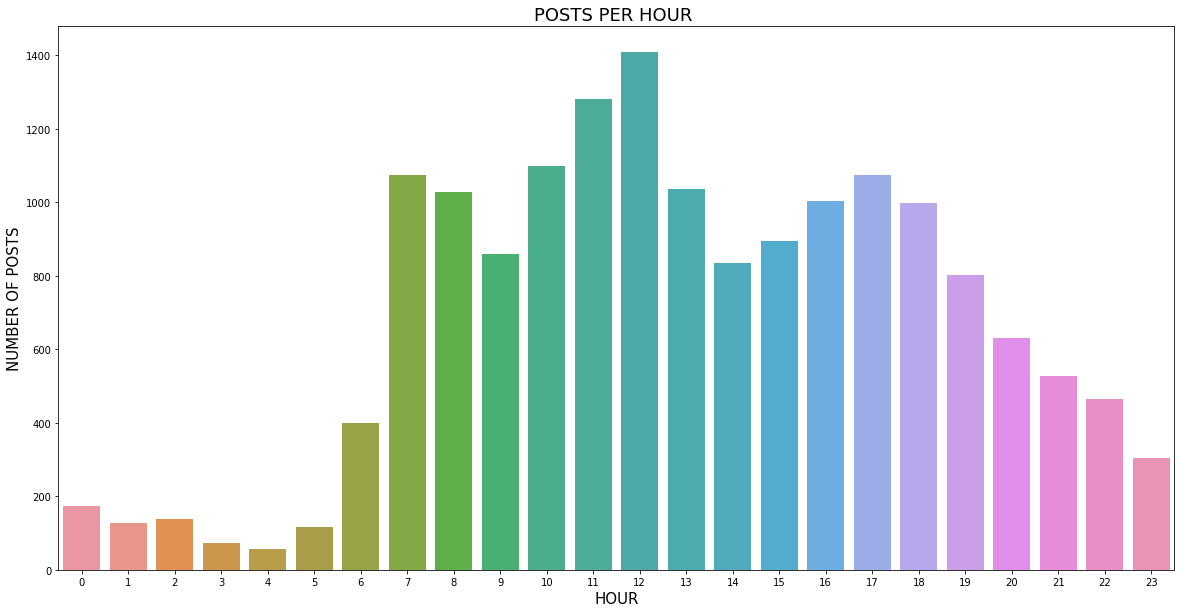

In [24]:
#analysis of posts for every hour for all months
plt.figure(figsize=(20,10))
ax=sns.countplot(data['Hour'])
ax.set_title('POSTS PER HOUR ', fontsize = 18)
ax.set_ylabel('NUMBER OF POSTS', fontsize = 15)
ax.set_xlabel ('HOUR', fontsize = 15)

#ANALYSIS OF POSTS FOR EVERY HOUR PER MONTH 


*   MONTH 1 AND 8 HAVE THE LOWSET NUMBER OF POSTS BETWEEN 10AM AND 1PM
*   MONTH 1 HAS THE HIGHEST NUMBER OF POSTS BETWEEN 0 AND 1AM
*   MONTH 8 HAS THE HIGHEST NUMBER OF POSTS AFTER 4PM
*   MONTHS 11 , 9 , 3 , 6 and 12 HAVE THE HIGHEST NUMBER OF POSTS BETWEEN 10AM AND 2PM



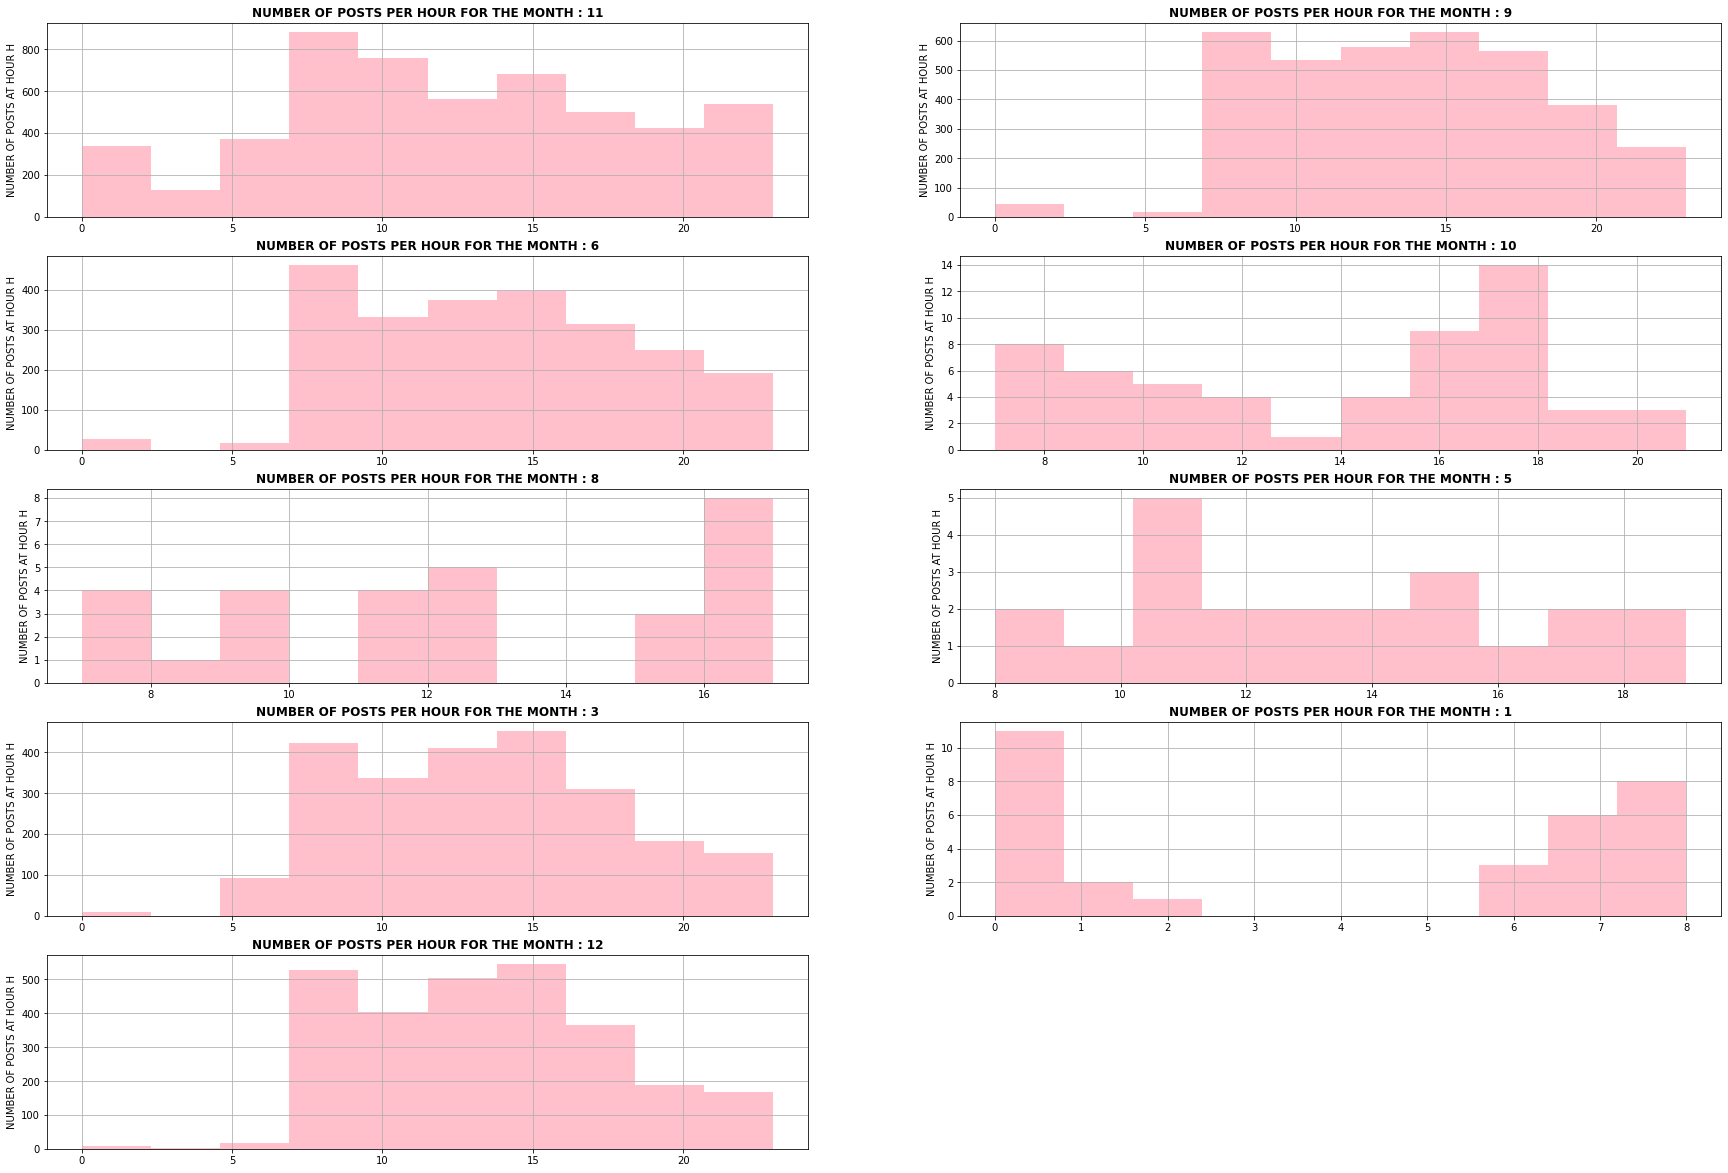

In [53]:
#ploting 9 figures of news posts for every hour per month 
#the size of our figure is 30*20
#subplots() function can help us draw multiple plots in one figure
#it takes three arguments that describes the layout of the figure
#The layout is organized in rows : 6 and columns : 2, which are represented by the first and second argument.
#The third argument represents the index of the current plot which is an iterator i
plt.figure(figsize=(30,25))
for i,month in enumerate(data["Month"].unique()):
    plt.subplot(6,2,i+1)
    x= data[data["Month"]==month]["Hour"]
    x.hist(color ='pink'    
           )
    plt.ylabel('NUMBER OF POSTS AT HOUR H')
    plt.title('NUMBER OF POSTS PER HOUR FOR THE MONTH : '+str(month),
          fontweight ="bold")

#WHICH MONTH HAS THE MOST POSTS:


*   ACCORDING TO THE PLOTS WE CAN SEE THAT SEPTEMBER AND NOVEMBER ARE THE MONTHS WITH THE HIGHEST NUMBER OF POSTS
*   JANUARY AND MAY ARE THE LEAST ONES



In [31]:
#plotly package for better data viz
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.5 MB/s 


In [32]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [33]:
data.groupby('Month')['Hour'].count()

Month
1       31
3     2371
5       22
6     2364
8       29
9     3613
10      57
11    5186
12    2729
Name: Hour, dtype: int64

In [43]:
#with go.bar, each row of the dataFrame is represented as a rectangular mark.
#the colors of the marks are continuous colors generated by plotly
trace1=go.Bar(
          x=data.groupby('Month')['Hour'].count().index,
          y=data.groupby('Month')['Hour'].count(),
          marker_color=[px.colors.qualitative.Dark24[i+1],px.colors.qualitative.Dark24[i+2],px.colors.qualitative.Dark24[i+3],px.colors.qualitative.Dark24[i+4],px.colors.qualitative.Dark24[i+5],px.colors.qualitative.Dark24[i+6]],
          text='TOTAL POSTS PER MONTH')
layouts = {'title': 'TOTAL POSTS PER MONTH'}
fig = go.Figure(data=trace1, layout=layouts)
iplot([trace1])

#WHICH DAY OF THE MONTH HAST THE MOST NEWS:



*   FROM THE HISTOGRAM WE CAN CONCLUDE THAT DAYS 18,19 AND 24 HAVE THE HIGHEST NUMBER OF POSTS
*   DAYS 2,3 AND 6 HAVE THE LOWEST NUMBER OF POSTS



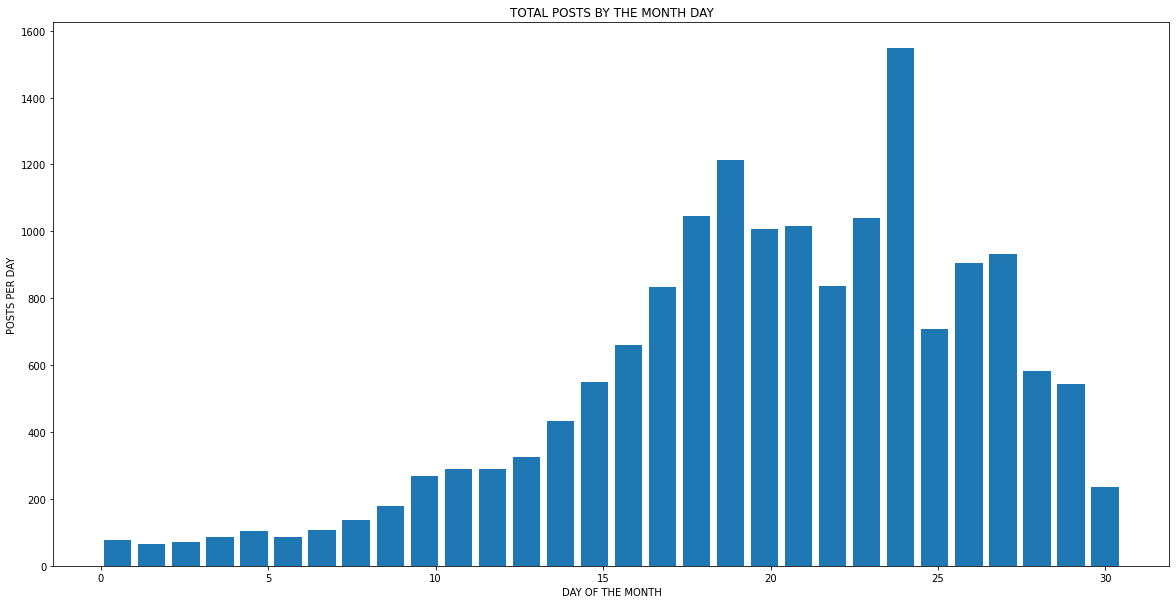

In [44]:
#here we are plotting a histogram with matplotlib
#rwidth param : is a relative width of the bars
#bins: Each bin is plotted as a bar whose height corresponds to how many data points are in that bin
# range : interval starting from 0 to 30 with an increase of 5
plt.figure(figsize=(20,10));
plt.hist(data["Day"],bins=30, rwidth=0.8,range=(0,30.5));
plt.xlabel('DAY OF THE MONTH')
plt.ylabel('POSTS PER DAY')
plt.title('TOTAL NEWS POSTS BY THE MONTH DAY');

#ANALYSIS OF TOTAL NEWS POSTS MONTH WISE

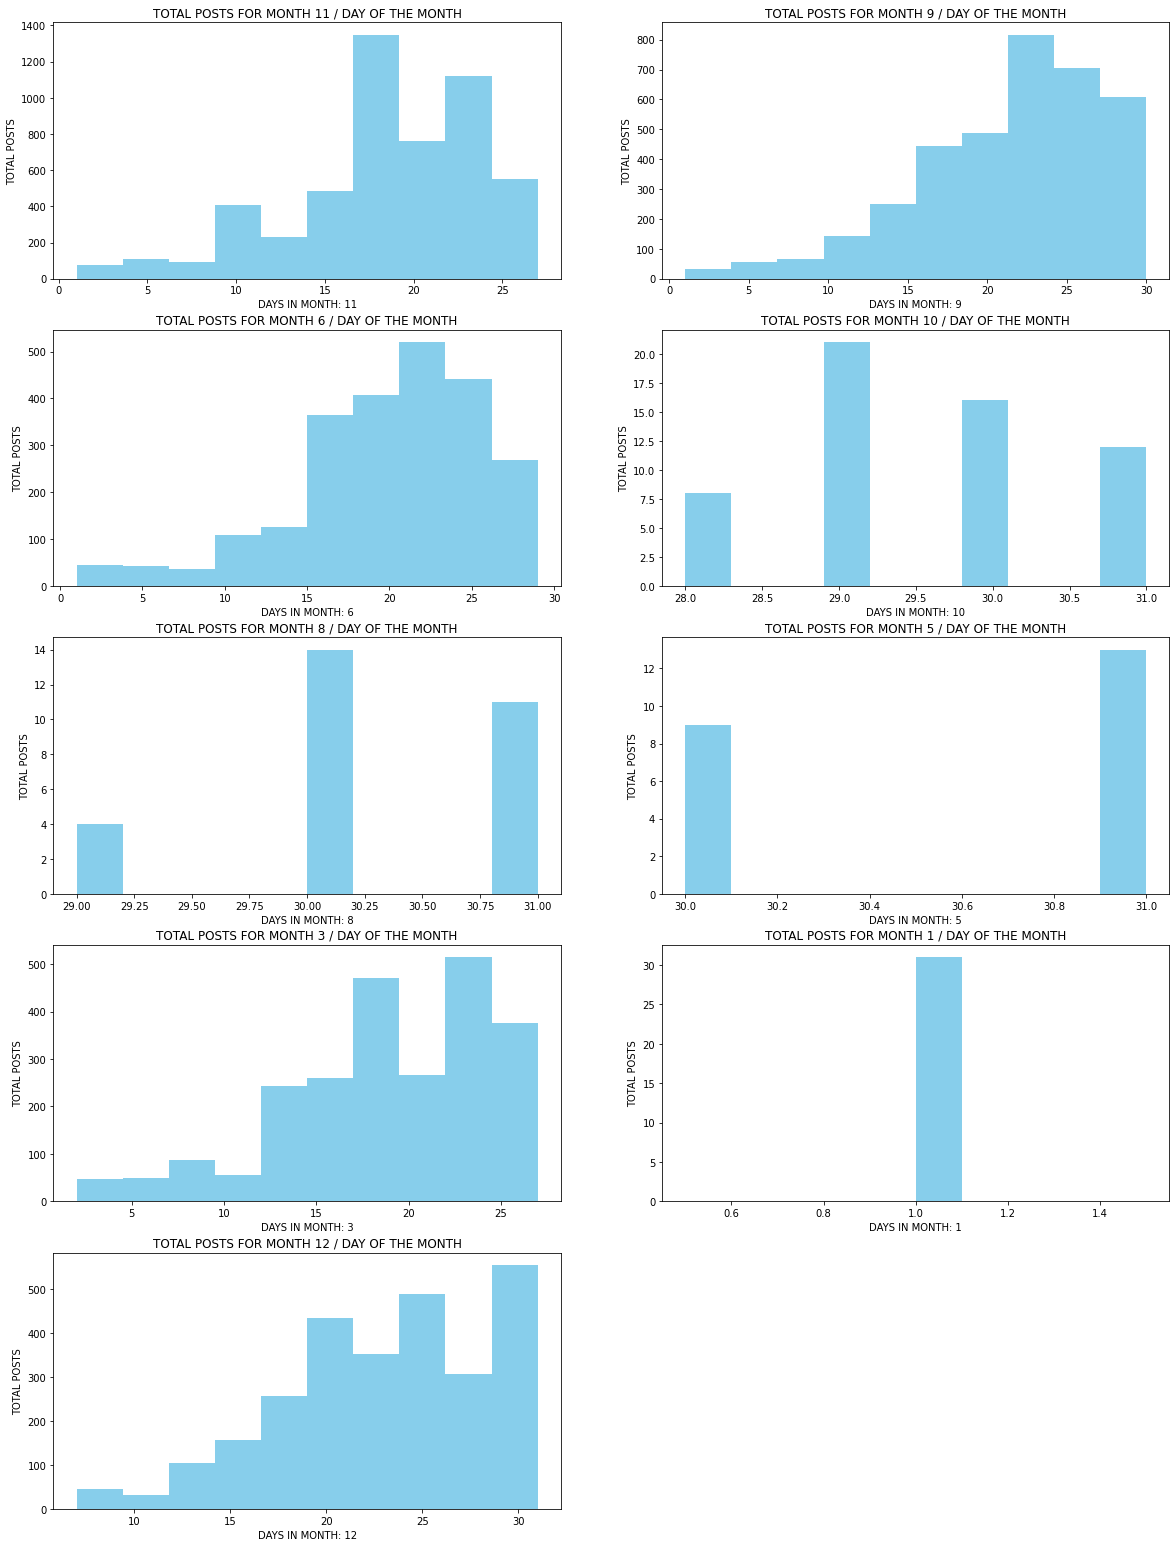

In [52]:
plt.figure(figsize=(20,33))
for i,month in enumerate (data['Month'].unique(),1):
    plt.subplot(6,2,i)
    df_new=data[data["Month"]==month]
    plt.hist(df_new['Day'],  color ='skyblue')
    plt.xlabel('DAYS IN MONTH: {}'.format(month))
    plt.ylabel('TOTAL POSTS')
    plt.title('TOTAL POSTS FOR MONTH {} / DAY OF THE MONTH'.format(month))

#CROSS ANALYSIS WITH HEATMAPS

In [54]:
def count_rows(rows):
    return len(rows)

#HEATMAP BY HOUR AND WEEKDAY

In [55]:
#Grouping data by weekdays and hours
by_cross=data.groupby(['Weekday','Hour']).apply(count_rows)
by_cross.head()

Weekday  Hour
Friday   0        25
         1         1
         5         3
         6        54
         7       163
dtype: int64

Pivot in python example
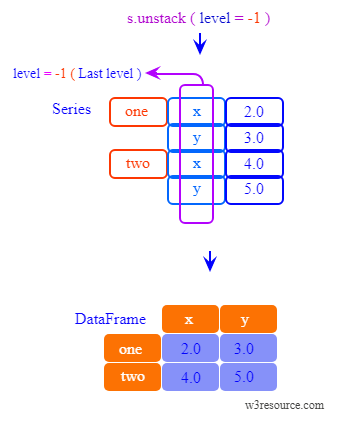

In [56]:
#Pivot a level of the (necessarily hierarchical) index labels, returning a
# DataFrame having a new level of column labels whose inner-most level 
#consists of the pivoted index labels.
pivot=by_cross.unstack()
pivot.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,25.0,1.0,NaN,NaN,NaN,3.0,54.0,163.0,126.0,119.0,156.0,144.0,235.0,174.0,176.0,190.0,173.0,180.0,183.0,179.0,151.0,156.0,130.0,62.0
Monday,13.0,2.0,NaN,NaN,1.0,1.0,26.0,172.0,158.0,109.0,140.0,185.0,196.0,135.0,102.0,126.0,170.0,130.0,132.0,107.0,87.0,68.0,61.0,34.0
Saturday,35.0,38.0,39.0,24.0,20.0,45.0,79.0,137.0,174.0,135.0,174.0,174.0,162.0,153.0,116.0,95.0,101.0,142.0,121.0,79.0,60.0,38.0,61.0,31.0
Sunday,8.0,1.0,1.0,NaN,NaN,1.0,24.0,66.0,146.0,106.0,121.0,163.0,148.0,123.0,111.0,108.0,119.0,125.0,94.0,111.0,51.0,58.0,41.0,27.0
Thursday,12.0,NaN,NaN,NaN,NaN,1.0,39.0,163.0,114.0,115.0,136.0,174.0,213.0,152.0,112.0,140.0,153.0,172.0,158.0,95.0,101.0,79.0,51.0,42.0


In [62]:
plt.figure(figsize=(20,15));
px.imshow(pivot,
          title=' HEATMAP BY HOUR AND WEEKDAY'
         )

<Figure size 1440x1080 with 0 Axes>

##Automation of Heatmaps

In [65]:
def heatmap(col1,col2):
    by_cross=data.groupby([col1,col2]).apply(count_rows)
    pivot=by_cross.unstack()
    plt.figure(figsize=(20,15));
    return px.imshow(pivot,
                    title=' Heatmap by {} and {}'.format(col1,col2)
                    )

In [66]:
#calling the function heatmap and passing the columns month and hour
#to get the heatmap of them
heatmap('Month','Hour')

<Figure size 1440x1080 with 0 Axes>

In [67]:
#calling the function heatmap and passing the columns month and Weekday
#to get the heatmap of them
heatmap('Month','Weekday')

<Figure size 1440x1080 with 0 Axes>

In [68]:
#wordcloud package for arabic language
!pip install ar_wordcloud

     |████████████████████████████████| 366 kB 34.7 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [70]:
#arabic reshaper
!pip install arabic-reshaper

In [71]:
!pip install python-bidi

In [72]:
import pandas as pd
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [73]:
#joining text data from the column post_text in a single variable
text = data['post_text']
text = [''.join(sentence) for sentence in text]
text = ''.join(text)

In [74]:
reshaped_text = arabic_reshaper.reshape(text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(width=700, height=300, background_color="white").generate(arabic_text)
wordcloud.to_image()

AssertionError: ignored